<a href="https://colab.research.google.com/github/saradom11/M-todos-num-ricos-1/blob/main/Polinomio_de_Newton_con_Sympy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Resolveremos esta tabla como ejemplo:
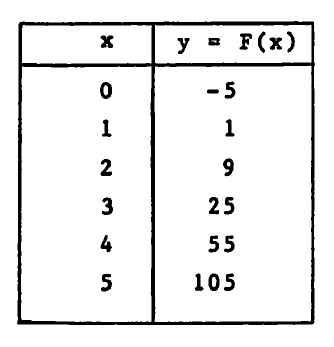

In [2]:
# Primero tenemos que importar las librerías:
import numpy as np   # Para poder usar arreglos
import matplotlib.pyplot as plt   # Para poder graficar
from sympy import symbols, simplify  # Para hacer y simplificar el polinomio

In [3]:
# Ingresare unos datos de ejemplo:
x = [0, 1, 2, 3, 4, 5]  # Lista con las coordenadas de los puntos "x"
y = [-5, 1, 9, 25, 55, 105]  # Lista con las coordenadas de los puntos "y"


In [4]:
# Número de puntos en la tabla de datos
n = len(x)

# Calcular diferencias divididas:
tabla = np.zeros((n, n))  # Creamos una matriz cuadrada de ceros (es la matriz que almacenará las diferencias divididas)
tabla[:, 0] = y   # La primera columna contiene los valores de y
for j in range(1, n):  # Ciclo para calcular las diferencias divididas
    for i in range(n - j):
        tabla[i, j] = (tabla[i + 1, j - 1] - tabla[i, j - 1]) / (x[i + j] - x[i])  # Con la fórmula calculamos las diferencias divididas


In [5]:
# Construir el polinomio de Newton
t = symbols('t')  # Definimos la variable para construir el polinomio
polinomio = tabla[0, 0]  # El primer término del polinomio es el primer elemento de la primera fila de la tabla
producto = 1
for i in range(1, n):
    producto *= (t - x[i - 1])  # Producto acumulativo
    polinomio += tabla[0, i] * producto  # Sumamos los términos del polinomio
polinomio = simplify(polinomio)  # Simplifica el polinomio


In [6]:
#Convierte el polinomio simbólico en una función numérica que puede evaluarse y así pode
polinomio_func = lambda t_val: [float(polinomio.subs(t, val)) for val in t_val]

# Generar puntos para la gráfica
t_vals = np.linspace(min(x), max(x), 500)  # Genera 500 puntos entre el mínimo y el máximo de x
p_vals = polinomio_func(t_vals)  # Evalua el polinomio en los puntos

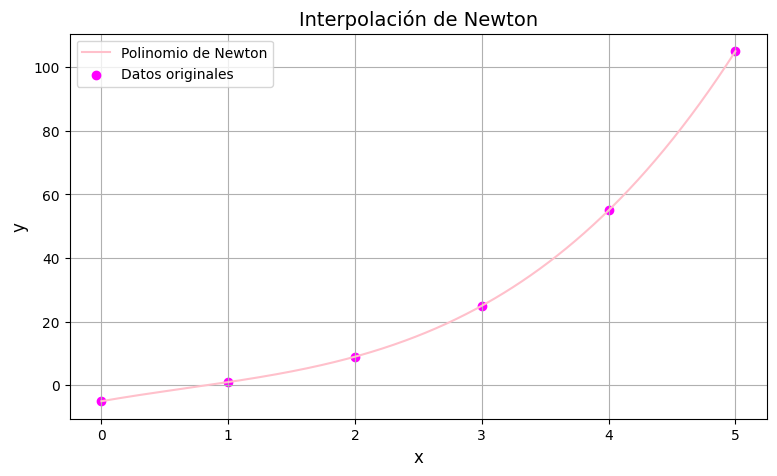

Polinomio de interpolación de Newton:
1.0*t**3 - 2.0*t**2 + 7.0*t - 5.0


In [7]:
# Graficar los datos originales y el polinomio
plt.figure(figsize=(9, 5))
plt.plot(t_vals, p_vals, label='Polinomio de Newton', color='pink') # Grafica el polinomio de Newton interpolado
plt.scatter(x, y, color='magenta', label='Datos originales')  # Ocupamos .scatter para gráficar los puntos dados en la tabla
plt.title('Interpolación de Newton', fontsize=14)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

print("Polinomio de interpolación de Newton:")
print(polinomio)
